In [2]:
import pandas as pd
import matplotlib.pyplot as plt

filename = './airBoxData.csv'
#pd.set_option("display.max_rows", None)

# Question 1

- Read the data into a data frame

In [3]:
df = pd.read_csv(filename)

- Display all records sorted by the PM2.5 values.

In [4]:
print(df.sort_values(by='PM2.5').reset_index())

         index        siteID  year  month  day  hour  weekday    gps_lat  \
0        23470  74DA38AF490C  2020      7   19    13        7  22.654000   
1       127455  74DA38EBF5FC  2020      7   23    23        4  22.335000   
2       127456  74DA38EBF5FC  2020      7   24     0        5  22.335000   
3        99884  74DA38EBF5E6  2020      7   18    23        6  24.118000   
4        99885  74DA38EBF5E6  2020      7   19     0        7  24.118000   
...        ...           ...   ...    ...  ...   ...      ...        ...   
150811   64829  74DA38F7C26E  2020      7   23    10        4  24.997000   
150812   59673  74DA38EBF6AE  2020      7   23     4        4  23.716000   
150813   48667  08BEAC0288D6  2020      7   21     2        2  24.983695   
150814   48694  08BEAC0288D6  2020      7   24     1        5  24.983695   
150815   85440  08BEAC0AB772  2020      7   18     5        6  24.126391   

           gps_lon       PM10        Tmp      PM2.5      PM1.0         RH  \
0       12

- Calculate and show how many devices in each city.

In [5]:
print(df.groupby('area')['siteID'].nunique().reset_index())

              area  siteID
0         changhua      53
1      chiayi_city      13
2    chiayi_county      18
3     hsinchu_city      19
4   hsinchu_county      22
5        kaohsiung      82
6          keelung       5
7           miaoli      38
8           nantou      24
9       new_taipei     129
10        pingtung      20
11       taichuang     253
12          tainan      51
13          taipei     126
14         taitung       2
15         taoyuan      31
16           yilan      16
17          yunlin      13


- Display the average PM2.5 values (over the whole time span) of each device and sort them by the PM2.5 values. You can identity which device location with the best/worst PM2.5 quality and observe some  unreasonable measurements.

In [6]:
print(df.groupby('siteID')['PM2.5'].mean().sort_values().reset_index())

           siteID      PM2.5
0    74DA38B05436   0.000000
1    74DA38B050CC   0.000000
2    74DA38B05352   0.000000
3    74DA38AF486A   0.000000
4    74DA38E2B622   0.000000
..            ...        ...
946  74DA38F7C26E  38.275570
947  74DA38EBF8AC  41.464293
948  08BEAC028920  42.182840
949  74DA38AF483E  48.537561
950  08BEAC0288D6  66.692419

[951 rows x 2 columns]


–	Display the average PM2.5 values (over the whole time span) of each city and sort them by the PM2.5 values. You can identity which city has the best/worst air quality. 

In [7]:
print(df.groupby('area')['PM2.5'].mean().sort_values().reset_index())

              area      PM2.5
0          taitung   2.770677
1            yilan   5.453694
2      chiayi_city   6.490991
3        kaohsiung   7.082535
4           yunlin   7.133232
5           tainan   7.352566
6    chiayi_county   7.557860
7         changhua   8.160436
8           nantou   8.363522
9     hsinchu_city   8.484143
10       taichuang   8.514756
11  hsinchu_county   9.111924
12         taoyuan   9.504175
13          taipei  10.051272
14        pingtung  10.404558
15          miaoli  12.079954
16         keelung  12.633222
17      new_taipei  13.591451


–	Calculate the average PM2.5 of each day within each city. List the results by sorting average PM2.5 values in an ascending order within each city, i.e. you should put average PM2.5 values of the same city together. (We do not mind the order among cities). You can identity which day has the best/worst air quality in each city.

In [8]:
print(df.groupby(['year', 'month','day', 'area'])['PM2.5'].mean().reset_index().sort_values(['area', 'PM2.5']).reset_index())

     index  year  month  day      area      PM2.5
0       54  2020      7   21  changhua   5.385666
1       36  2020      7   20  changhua   6.149395
2      108  2020      7   24  changhua   6.616082
3        0  2020      7   18  changhua   7.421002
4       72  2020      7   22  changhua   8.439990
..     ...   ...    ...  ...       ...        ...
121     71  2020      7   21    yunlin   4.774975
122     53  2020      7   20    yunlin   5.151340
123     35  2020      7   19    yunlin   7.761221
124     89  2020      7   22    yunlin  11.564468
125    107  2020      7   23    yunlin  12.035296

[126 rows x 6 columns]


– Calculate average PM 2.5 values (all devices in Taiwan) of each hour on Friday and do the same thing for Saturday. List the results by a table. The table has three columns whose names should be “hour”, “Friday_PM2.5” and “Saturday_PM2.5”. The result should be sorted by “hour” in an ascending order You can observe the difference of air quality change over time between Friday and Saturday. 

In [9]:
print(df[df['weekday'] == 5].groupby('hour')['PM2.5'].mean().reset_index().rename(columns={'hour': 'hour', 'PM2.5': 'Friday_PM2.5'}).merge(
        df[df['weekday'] == 6].groupby('hour')['PM2.5'].mean().reset_index().rename(columns={'hour': 'hour', 'PM2.5': 'Saturday_PM2.5'}),on='hour', how='inner').sort_values('hour'))

    hour  Friday_PM2.5  Saturday_PM2.5
0      0      8.379282        7.859925
1      1      8.379035        6.512187
2      2      8.102212        5.709651
3      3      8.131230        5.874490
4      4      8.259331        5.608954
5      5      8.725270        5.801975
6      6      9.560076        5.970190
7      7      9.953535        5.653011
8      8      9.133940        4.870171
9      9      8.991955        4.837723
10    10     10.243132        5.215046
11    11     10.898488        6.003420
12    12     11.130155        6.303721
13    13      9.053625        6.405692
14    14      7.619646        6.363282
15    15      6.901259        6.573889
16    16      5.995774        6.385970
17    17      6.323988        7.191829
18    18      6.621482        8.304383
19    19      7.754749        8.945591
20    20      8.307870        9.569890
21    21      8.190150       10.010788
22    22      8.535912       10.185119
23    23      8.562165       10.124124


# Question 2

- Is the PM2.5 related to PM1.0? You should choose and create a visualization to support your answer.

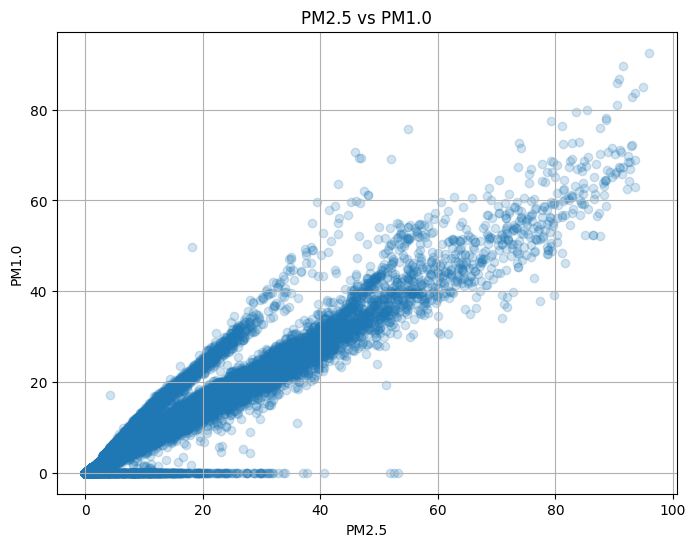

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(df['PM2.5'], df['PM1.0'], alpha=0.2)
plt.title('PM2.5 vs PM1.0')
plt.xlabel('PM2.5')
plt.ylabel('PM1.0')
plt.grid(True)

plt.show()

- Among Taipei, Pingtung, Nantou and Taichuang, which city has the most significant difference PM2.5 change pattern over the whole day on July 24 from the other three cities? You should choose and create a visualization to support your answer

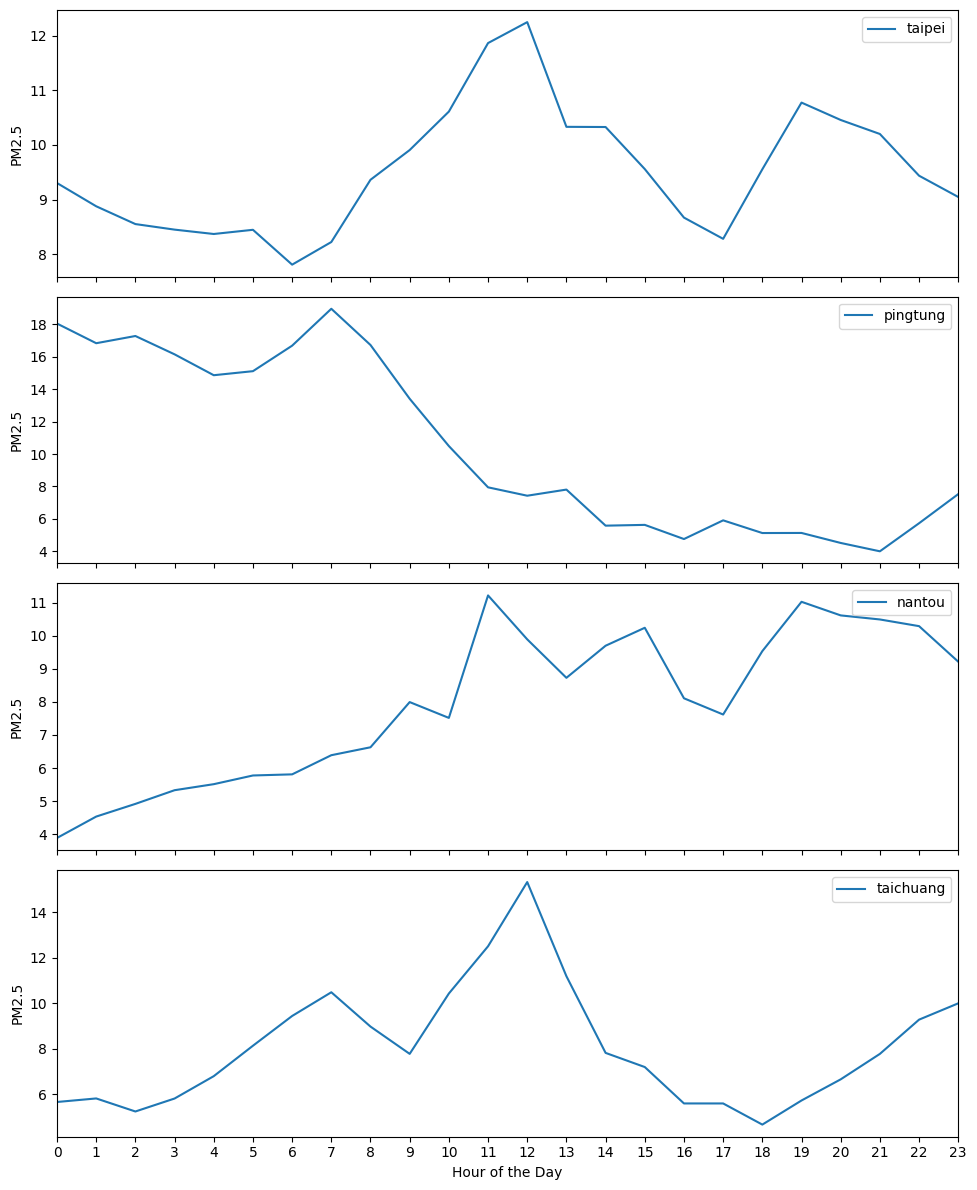

In [11]:
# Filter data for July 24
july_24_data = df[(df['month'] == 7) & (df['day'] == 24)].groupby(['area','hour'])['PM2.5'].mean().reset_index()

# Select cities of interest
cities = ['taipei', 'pingtung', 'nantou', 'taichuang']

# Create subplots for each city
fig, axes = plt.subplots(len(cities), 1, figsize=(10, 12), sharex=True)

# Plot PM2.5 change for each city
for i, city in enumerate(cities):
    city_data = july_24_data[july_24_data['area'] == city]
    axes[i].plot(city_data['hour'], city_data['PM2.5'], label=city)
    axes[i].set_ylabel('PM2.5')
    axes[i].legend()

# Set common x-axis label
axes[-1].set_xlabel('Hour of the Day')

plt.xticks(range(0,24))
plt.xlim(0, 23)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

- (Assume we only consider PM2.5 to evaluate the air quality) Please implement the following steps to answer which city (Taipei or Tainan) has a better air quality.

1. Remove all records whose PM2.5 is 0 (simple data cleaning process to remove impossible data values)

In [12]:
df1 = df[df['PM2.5'] != 0]
print(df1)

              siteID  year  month  day  hour  weekday  gps_lat  gps_lon  \
0       08BEAC0286D2  2020      7   18     1        6   23.876  120.529   
1       08BEAC0286D2  2020      7   18     2        6   23.876  120.529   
2       08BEAC0286D2  2020      7   18     3        6   23.876  120.529   
3       08BEAC0286D2  2020      7   18     4        6   23.876  120.529   
4       08BEAC0286D2  2020      7   18     5        6   23.876  120.529   
...              ...   ...    ...  ...   ...      ...      ...      ...   
150811  74DA38F7C19A  2020      7   24    21        5   24.053  120.629   
150812  74DA38F7C19A  2020      7   24    22        5   24.053  120.629   
150813  74DA38F7C19A  2020      7   24    23        5   24.053  120.629   
150814  74DA38F7C19A  2020      7   18     0        6   24.053  120.629   
150815  74DA38F7C19A  2020      7   18     1        6   24.053  120.629   

             PM10        Tmp      PM2.5      PM1.0         RH      area  
0        4.800000  30.544

2. Collect all records from Taipei and draw a histogram to shows how many hour PM2.5 records in each histogram bin interval. Set the histogram bin count to 100, the min value to 0 and max value to 100 to create the histogram.

     day  hour      PM2.5
0     18     0   9.355308
1     18     1   8.380846
2     18     2   6.780895
3     18     3   6.702812
4     18     4   6.871004
..   ...   ...        ...
163   24    19  11.219774
164   24    20  10.889062
165   24    21  10.622580
166   24    22  10.164716
167   24    23   9.746182

[168 rows x 3 columns]


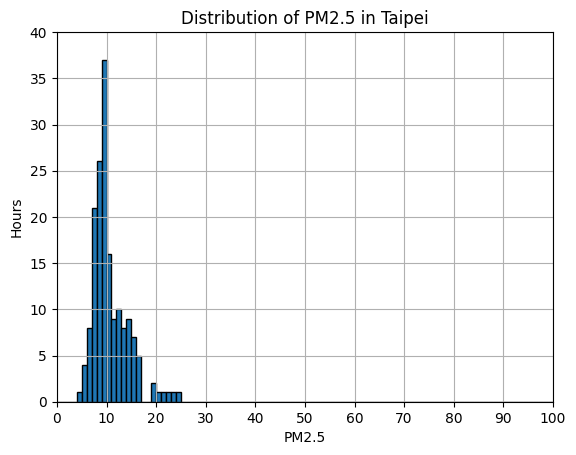

In [13]:
taipei_data  = df1[df1['area']=='taipei'].groupby(['day', 'hour'])['PM2.5'].mean().reset_index()
print(taipei_data)

plt.hist(taipei_data['PM2.5'], bins=100, range=(0, 100), edgecolor='black')
plt.xlabel('PM2.5')
plt.ylabel('Hours')
plt.title('Distribution of PM2.5 in Taipei')
plt.xticks(range(0, 101, 10))
plt.xlim(0, 100)
plt.ylim([0, 40])
plt.grid(True)

# Show the histogram
plt.show()

3. Repeat the above step to draw a histogram for Tainan.

     day  hour     PM2.5
0     18     0  5.992596
1     18     1  5.092149
2     18     2  5.475278
3     18     3  4.994315
4     18     4  5.130827
..   ...   ...       ...
163   24    19  1.271226
164   24    20  4.299024
165   24    21  6.367105
166   24    22  6.404149
167   24    23  7.114010

[168 rows x 3 columns]


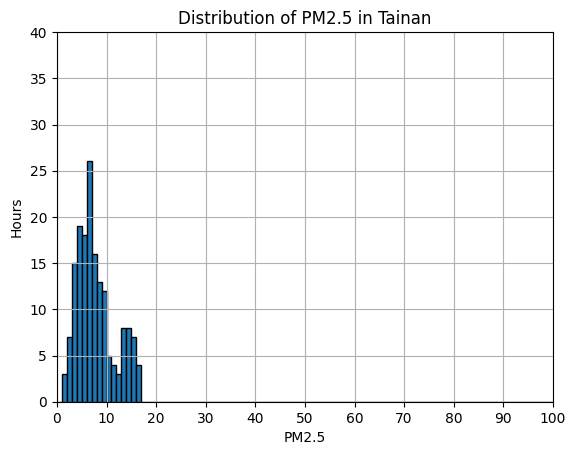

In [14]:
tainan_data  = df1[df1['area']=='tainan'].groupby(['day', 'hour'])['PM2.5'].mean().reset_index()
print(tainan_data)

plt.hist(tainan_data['PM2.5'], bins=100, range=(0, 100), edgecolor='black')
plt.xlabel('PM2.5')
plt.ylabel('Hours')
plt.title('Distribution of PM2.5 in Tainan')
plt.xticks(range(0, 101, 10))
plt.xlim(0, 100)
plt.ylim(0, 40)
plt.grid(True)

# Show the histogram
plt.show()

4. Observe these two histograms to answer which city has a better air quality in the time span of the dataset and explain your answer.

Most of time the concentration of the PM2.5 in Taipei is around 10 ppm, but that is less than 10 in Tainan. Moreover, the concentration sometimes is more than 20 ppm in Taipei. So Tainan has a better air quality than Taipei.